In [1]:
import numpy as np

import pandas as pd

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC

## Feature Engineering and save the final data

In [ ]:
# All=pd.read_csv('network_user_ling.csv')
All.shape


All0=All.drop(['Unnamed: 0', 'id', 'name', 'protected',
       'label', 'Unnamed: 0.1', 'tweet_id', 'user_id', 'time','language','timezone','text','verification','created_time','count','publishing_time','membership_age'],axis=1)
np.array(All0.columns)

All0.isnull().sum()

# All0.drop('timezone',axis=1,inplace=True)

All0['location']=np.where(All0['location'].isnull(),1,0)
All0['description']=np.where(All0['description'].isnull(),1,0)
All0.head(10)
# All0.isnull().sum()

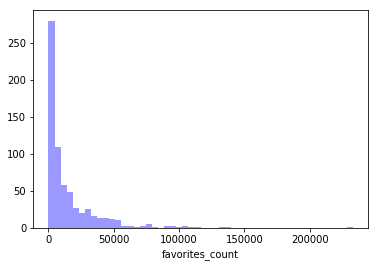

In [54]:
All0.head(10)
sns.distplot(All0['favorites_count'],kde=False,color='b')

All0.describe()

np.array(All0.columns)

In [356]:
All0.dtypes
len(All0.columns)#97
All0.to_csv('all_bc.csv',index=False)

### word count analysis

In [39]:
all_text=pd.read_csv('network_user_ling.csv')
all_text.head()
all_text.head()


Unnamed: 0            id         name      screen_name     location  \
0           2  3.146533e+09      Wesmoms          Wesmoms        Texas   
1           4  1.919084e+07          Jen        nerbonnej  Southern RI   
2           5  8.977974e+08           JJ           jjd_53          NaN   
3           6  9.341670e+17       Joyjoy  freedom_girlbot          NaN   
4           7  1.825501e+07  spectre2012      spectre2012          NaN   

   protected                                        description  \
0      False  I was mom to Wesley, cutest Pomeranian ever. C...   
1      False  Mom of 3, #ProConstitution, #MAGA, Dog Lover 🐶...   
2      False                                                NaN   
3      False  True patriot🇺🇸🇺🇸 fighting 💪the gangster govern...   
4      False  I follow everything and anything that can effe...   

   followers_count  friends_count  listed_count   ...   time.1  work  \
0             1957           2118             1   ...     2.33  0.00   
1             5440           5073             3   ...     4.76  9.52   
2              188             40             2   ...     0.00  2.63   
3             8587           5489             7   ...     6.67  0.00   
4              168             74             6   ...     0.00  0.00   

   informal  AllPunc  Period Comma  QMark Exclam Apostro  OtherP  
0      9.30    16.28    6.98  6.98   0.00    0.0     0.0    2.33  
1      0.00     0.00    0.00  0.00   0.00    0.0     0.0    0.00  
2      2.63    13.16    2.63  0.00  10.53    0.0     0.0    0.00  
3      3.33    10.00    0.00  0.00   0.00   10.0     0.0    0.00  
4      0.00     9.09    0.00  9.09   0.00    0.0     0.0    0.00  

[5 rows x 114 columns]

In [45]:
all_text['words_count']=len(all_text['text'].str.split())
all_text['char_count']=len(all_text['text'])

In [47]:
all_text['char_count'].value_counts()

661    661
Name: char_count, dtype: int64

### Dummy code certain features based on their statistics summary

In [66]:
All0['followers_85']=np.where(All0['followers_count']<=85,1,0)
All0['followers_85_454']=np.where((All0['followers_count']<=454) & (All0['followers_count']>85),1,0)
All0.head(10)

All0['followers_454_1921']=np.where((All0['followers_count']<=1921) & (All0['followers_count']>454),1,0)
All0['followers_1921']=np.where(All0['followers_count']>1921,1,0)

All0['friends_192']=np.where(All0['friends_count']<=192,1,0)
All0['friends_192_611']=np.where((All0['friends_count']>192) & (All0['friends_count']<=611) ,1,0)
All0['friends_611_2294']=np.where((All0['friends_count']>611) & (All0['friends_count']<=2294) ,1,0)
All0['friends_2294']=np.where(All0['friends_count']>2294 ,1,0)

All0['favorites_2_1624']=np.where((All0['favorites_count']>=2) & (All0['favorites_count']<=1624),1,0)
All0['favorites_1624_6669']=np.where((All0['favorites_count']>1624) & (All0['favorites_count']<=6669) ,1,0)
All0['favorites_6669_18559']=np.where((All0['favorites_count']>6669) & (All0['favorites_count']<=18559) ,1,0)
All0['favorites_18559']=np.where(All0['favorites_count']>18559 ,1,0)

All0['statuses_4_2439']=np.where((All0['statuses_count']>=4) & (All0['statuses_count']<=2439),1,0)
All0['statuses_2439_7860']=np.where((All0['statuses_count']>2439) & (All0['statuses_count']<=7860) ,1,0)
All0['statuses_7860_19424']=np.where((All0['statuses_count']>7860) & (All0['statuses_count']<=19424) ,1,0)
All0['statuses_19424']=np.where(All0['statuses_count']>19424 ,1,0)
All0.to_csv('all_BC.csv',index=False)
len(All0.columns)#113

In [69]:
np.array(All0.columns)


array(['screen_name', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'topic', 'stance', 'publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2', 'scaled_followers',
       'scaled_friends', 'influence', 'weighted_influence', 'cluster',
       'clustering_coeff', 'degree_centrality', 'closeness_centrality',
       'follows_Trump', 'cycle', 'triangles', 'WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
       'ppron', 'i', 'you', 'shehe', 'they', 'ipron', 'article', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare',
       'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo',
       'anger', 'social', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'bio',
       'drives', 'affili

### Numeric-code the labels

In [75]:
All0=pd.read_csv('all_BC.csv')
dict={'Strong Agreement':4,'Weak Agreement':3,'Neutral':2,'Weak Disagreement':1,'Strong Disagreement':0}
All0['stance']=All0['stance'].map(dict)
All0['stance'].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [78]:
col=['stance','location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count','publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2','followers_85',
       'followers_85_454', 'followers_454_1921', 'followers_1921',
       'friends_192', 'friends_192_611', 'friends_611_2294',
       'friends_2294', 'favorites_2_1624', 'favorites_1624_6669',
       'favorites_6669_18559', 'favorites_18559', 'statuses_4_2439',
       'statuses_2439_7860', 'statuses_7860_19424', 'statuses_19424']
user=All0[col]
user.head(10)

stance  location  description  followers_count  friends_count  \
0       2         0            0             1957           2118   
1       1         0            0             5440           5073   
2       3         1            1              188             40   
3       2         1            0             8587           5489   
4       2         1            0              168             74   
5       2         0            1               29            109   
6       2         0            0             1136           1256   
7       2         0            0             2573            724   
8       4         0            0             2542           3334   
9       2         0            0             7101           7815   

   listed_count  favorites_count  statuses_count  publishing_days  \
0             1            15054           19454               13   
1             3             7350            4807               13   
2             2            28744           11073               13   
3             7            15526            6992               13   
4             6              620            3618               13   
5             1             9962             671               13   
6            19            11346           21107               13   
7           102            23338            6280               13   
8             0            41074            5030               13   
9             2           107385           45804               13   

   membership_years       ...        friends_611_2294  friends_2294  \
0                 3       ...                       1             0   
1                 9       ...                       0             1   
2                 6       ...                       0             0   
3                 0       ...                       0             1   
4                 9       ...                       0             0   
5                 7       ...                       0             0   
6                 1       ...                       1             0   
7                10       ...                       1             0   
8                 1       ...                       0             1   
9                 2       ...                       0             1   

   favorites_2_1624  favorites_1624_6669  favorites_6669_18559  \
0                 0                    0                     1   
1                 0                    0                     1   
2                 0                    0                     0   
3                 0                    0                     1   
4                 1                    0                     0   
5                 0                    0                     1   
6                 0                    0                     1   
7                 0                    0                     0   
8                 0                    0                     0   
9                 0                    0                     0   

   favorites_18559  statuses_4_2439  statuses_2439_7860  statuses_7860_19424  \
0                0                0                   0                    0   
1                0                0                   1                    0   
2                1                0                   0                    1   
3                0                0                   1                    0   
4                0                0                   1                    0   
5                0                1                   0                    0   
6                0                0                   0                    0   
7                1                0                   1                    0   
8                1                0                   1                    0   
9                1                0                   0                    0   

   statuses_19424  
0               1  
1               0  
2               0  
3               0  
4   

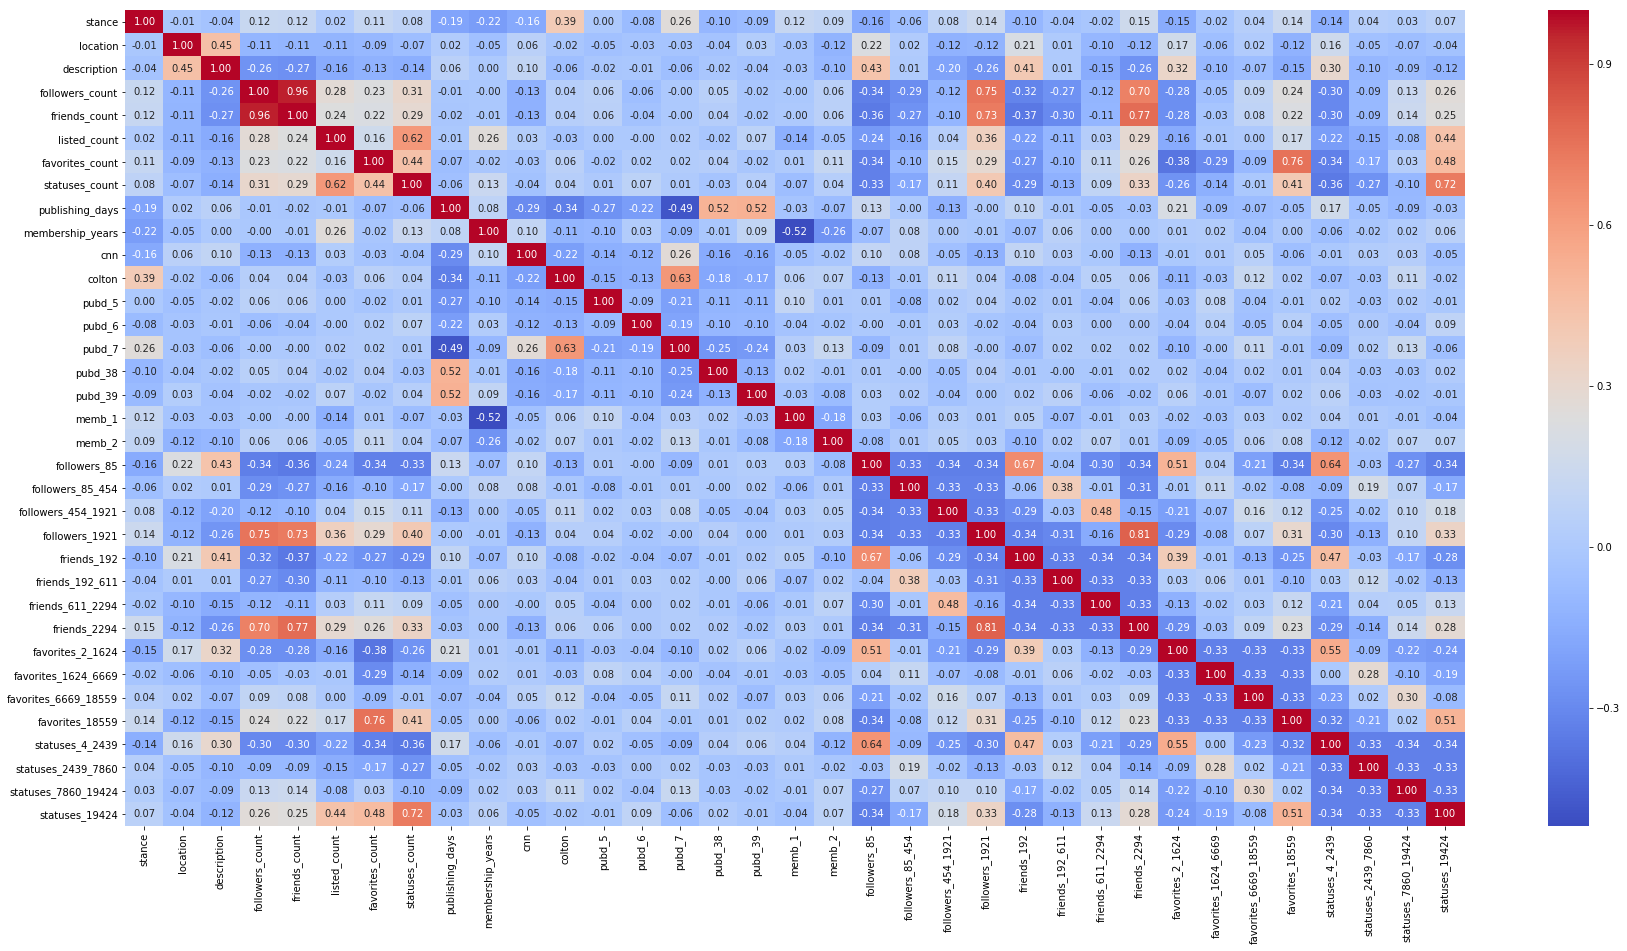

In [79]:
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(user.corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [86]:
np.array(user.columns)

array(['stance', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'publishing_days', 'membership_years', 'cnn',
       'colton', 'pubd_5', 'pubd_6', 'pubd_7', 'pubd_38', 'pubd_39',
       'memb_1', 'memb_2', 'followers_85', 'followers_85_454',
       'followers_454_1921', 'followers_1921', 'friends_192',
       'friends_192_611', 'friends_611_2294', 'friends_2294',
       'favorites_2_1624', 'favorites_1624_6669', 'favorites_6669_18559',
       'favorites_18559', 'statuses_4_2439', 'statuses_2439_7860',
       'statuses_7860_19424', 'statuses_19424'], dtype=object)

+ based on the corr heatmap, drop highly correlated features such as 'location', 'description',  'listed_count','statuses_count','pubd_5', 'pubd_6','pubd_39','memb_2','followers_85_454', 'followers_454_1921','favorites_1624_6669', 'favorites_6669_18559','statuses_2439_7860','statuses_7860_19424', 'statuses_19424','friends_611_2294'
+ after dropping all the above features, no improvement on the correlation map

### User Features

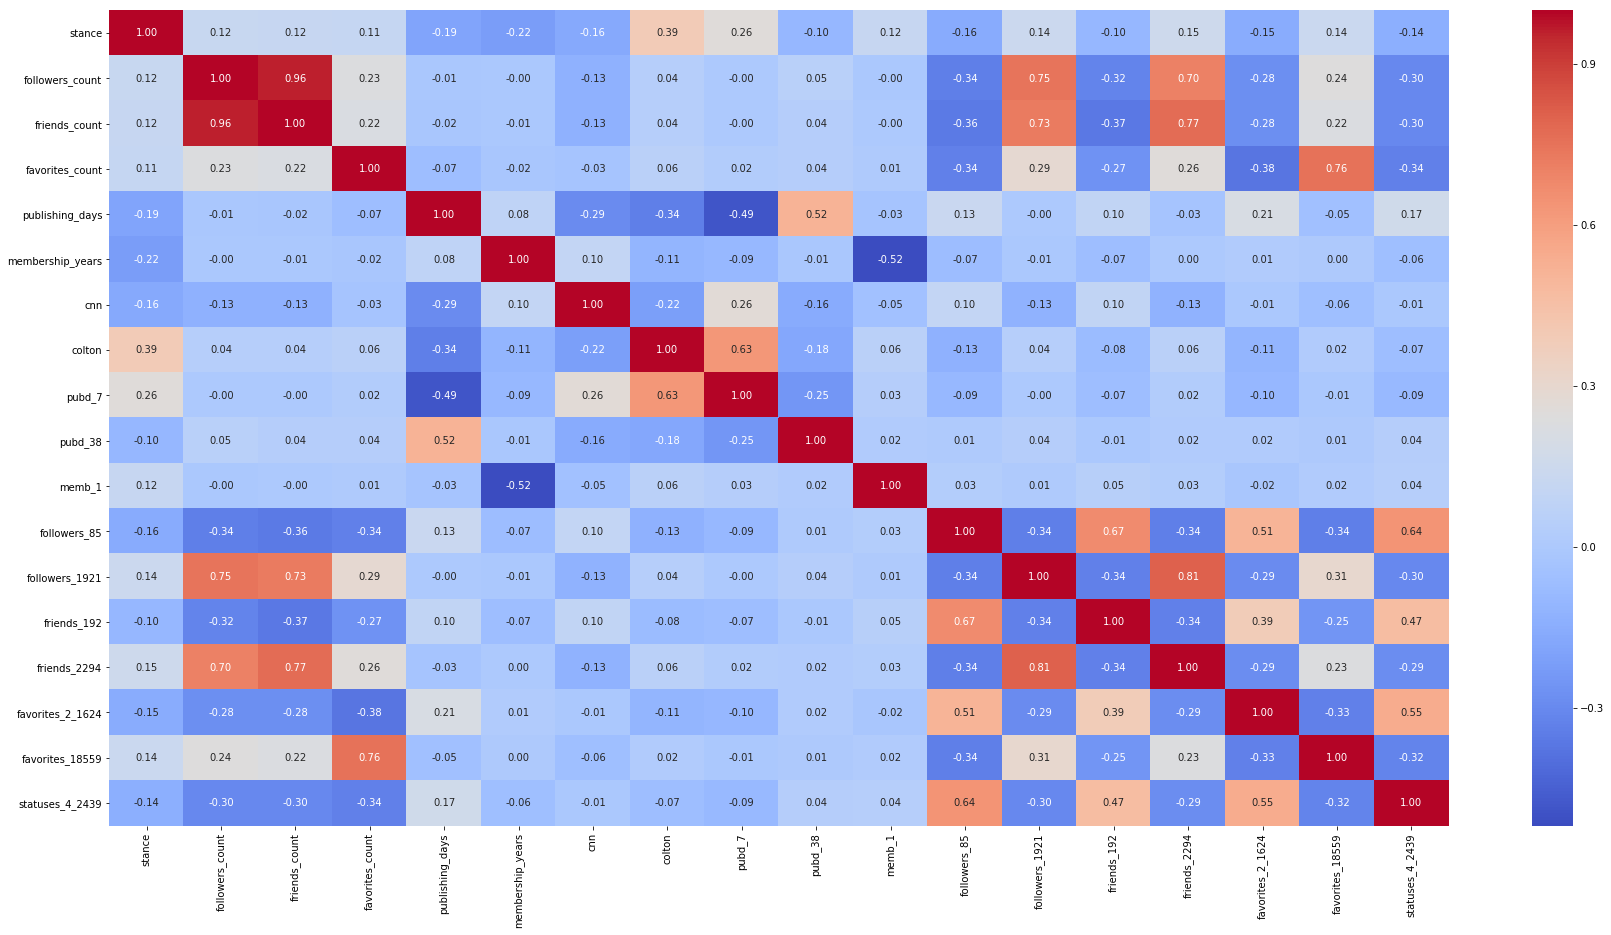

In [141]:
col0=['location', 'description','listed_count','statuses_count','pubd_5', 'pubd_6','pubd_39','memb_2','followers_85_454', 
      'followers_454_1921','favorites_1624_6669', 'favorites_6669_18559',
      'statuses_2439_7860','statuses_7860_19424', 'statuses_19424','friends_611_2294','friends_192_611']
user0=user.drop(col0,axis=1)
user0.head(10)
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(user0.corr(),annot=True,fmt='.2f',cmap='coolwarm')

### Network features

In [81]:
col1=['stance','scaled_followers',
       'scaled_friends', 'influence', 'weighted_influence', 'cluster',
       'clustering_coeff', 'degree_centrality', 'closeness_centrality',
       'follows_Trump', 'cycle', 'triangles']
network=All0[col1]
network.head(10)

stance  scaled_followers  scaled_friends  influence  weighted_influence  \
0       2          0.006072        0.026428   0.923985            0.005610   
1       1          0.016878        0.063299   1.072344            0.018099   
2       3          0.000583        0.000499   4.700000            0.002741   
3       2          0.026642        0.068490   1.564402            0.041678   
4       2          0.000521        0.000923   2.270270            0.001183   
5       2          0.000090        0.001360   0.266055            0.000024   
6       2          0.003525        0.015672   0.904459            0.003188   
7       2          0.007983        0.009034   3.553867            0.028370   
8       4          0.007887        0.041601   0.762448            0.006013   
9       2          0.022031        0.097513   0.908637            0.020018   

   cluster  clustering_coeff  degree_centrality  closeness_centrality  \
0      1.0          0.004361           0.002446              0.375677   
1      4.0          0.002860           0.006293              0.353855   
2      3.0          0.000000           0.000269              0.321307   
3      4.0          0.002523           0.008970              0.393659   
4      3.0          0.000000           0.000217              0.319934   
5      2.0          0.000000           0.000126              0.315643   
6      2.0          0.001864           0.001480              0.341605   
7      3.0          0.000067           0.002643              0.329926   
8      1.0          0.002364           0.003456              0.387146   
9      4.0          0.002635           0.007993              0.355947   

   follows_Trump  cycle  triangles  
0            0.0    1.0    16811.0  
1            1.0    1.0    72977.0  
2            1.0    1.0        0.0  
3            1.0    1.0   130751.0  
4            1.0    1.0        0.0  
5            1.0    1.0        0.0  
6            1.0    1.0     2629.0  
7            0.0    1.0      300.0  
8            1.0    1.0    18187.0  
9            1.0    1.0   108458.0

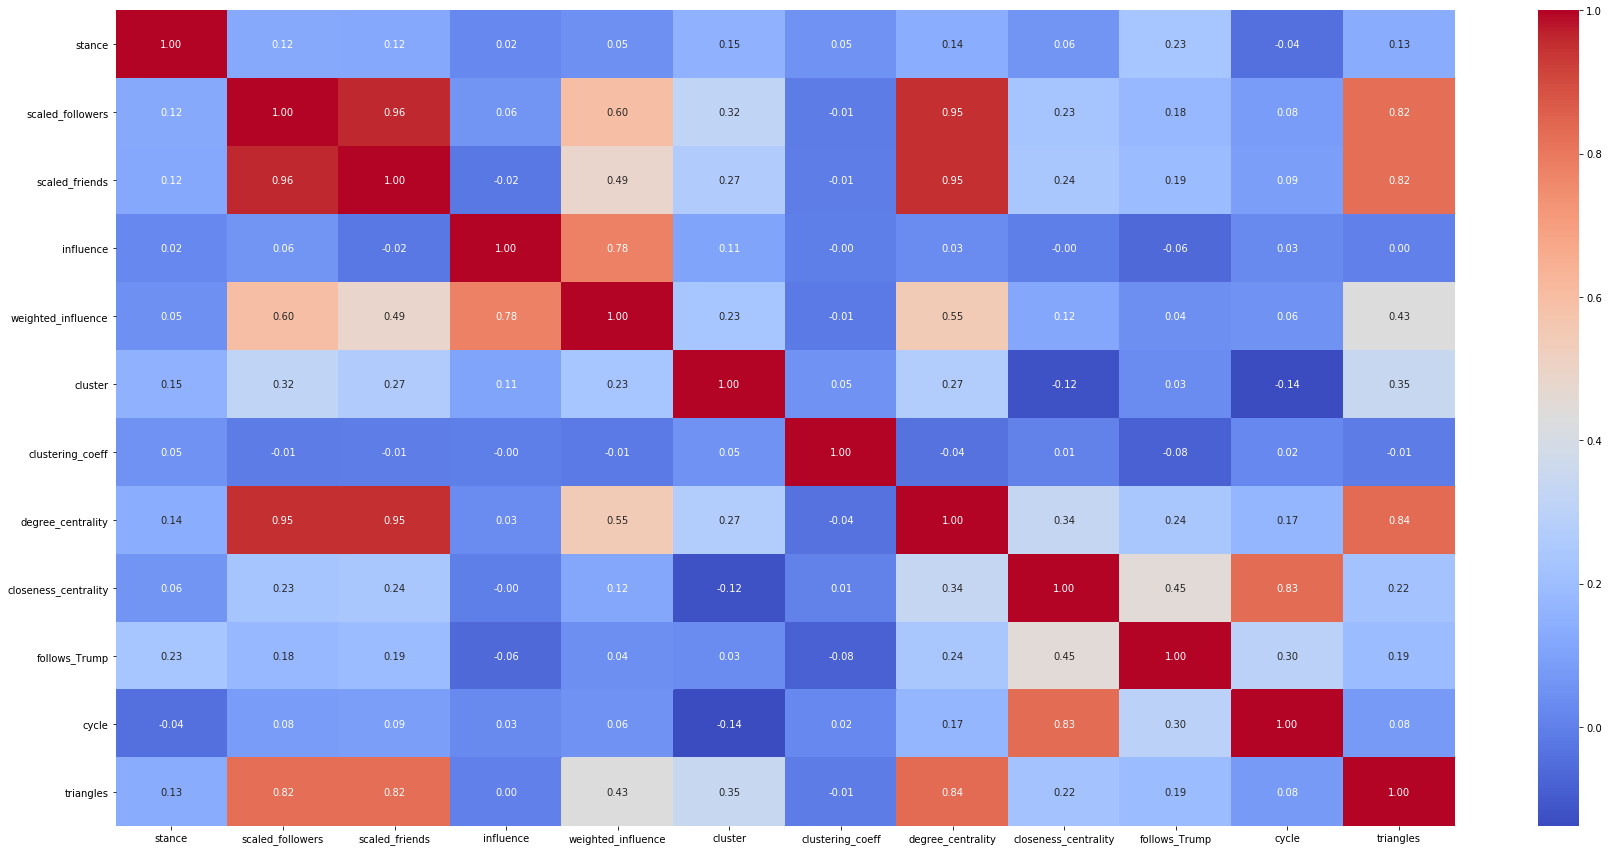

In [82]:
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(network.corr(),annot=True,fmt='.2f',cmap='coolwarm')

+ without stance, the corr between other var is the same
+ based on corr map, take away scaled followers, weighted influence, cycle,clustering_coef


In [84]:
np.array(network.columns)

array(['stance', 'scaled_followers', 'scaled_friends', 'influence',
       'weighted_influence', 'cluster', 'clustering_coeff',
       'degree_centrality', 'closeness_centrality', 'follows_Trump',
       'cycle', 'triangles'], dtype=object)

In [278]:
# network0=network.drop(['scaled_followers', 'influence','weighted_influence','clustering_coeff','closeness_centrality', 'cycle'],axis=1)
# network.head()

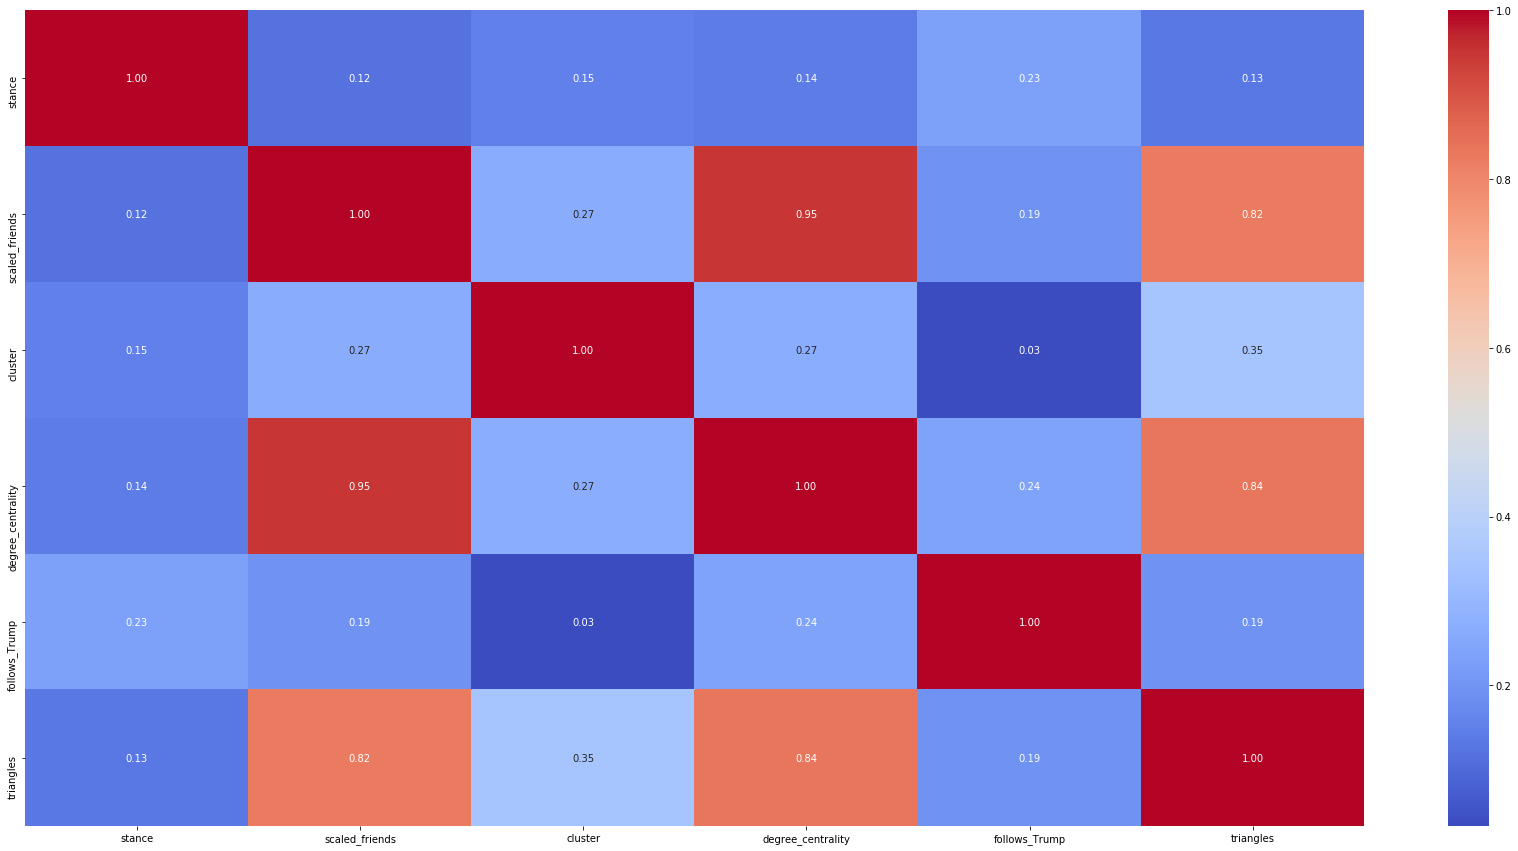

In [140]:
network0=network.drop(['scaled_followers', 'influence','weighted_influence','clustering_coeff','closeness_centrality', 'cycle'],axis=1)
np.array(network0.columns)
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(network0.corr(),annot=True,fmt='.2f',cmap='coolwarm')

### Linguistic features

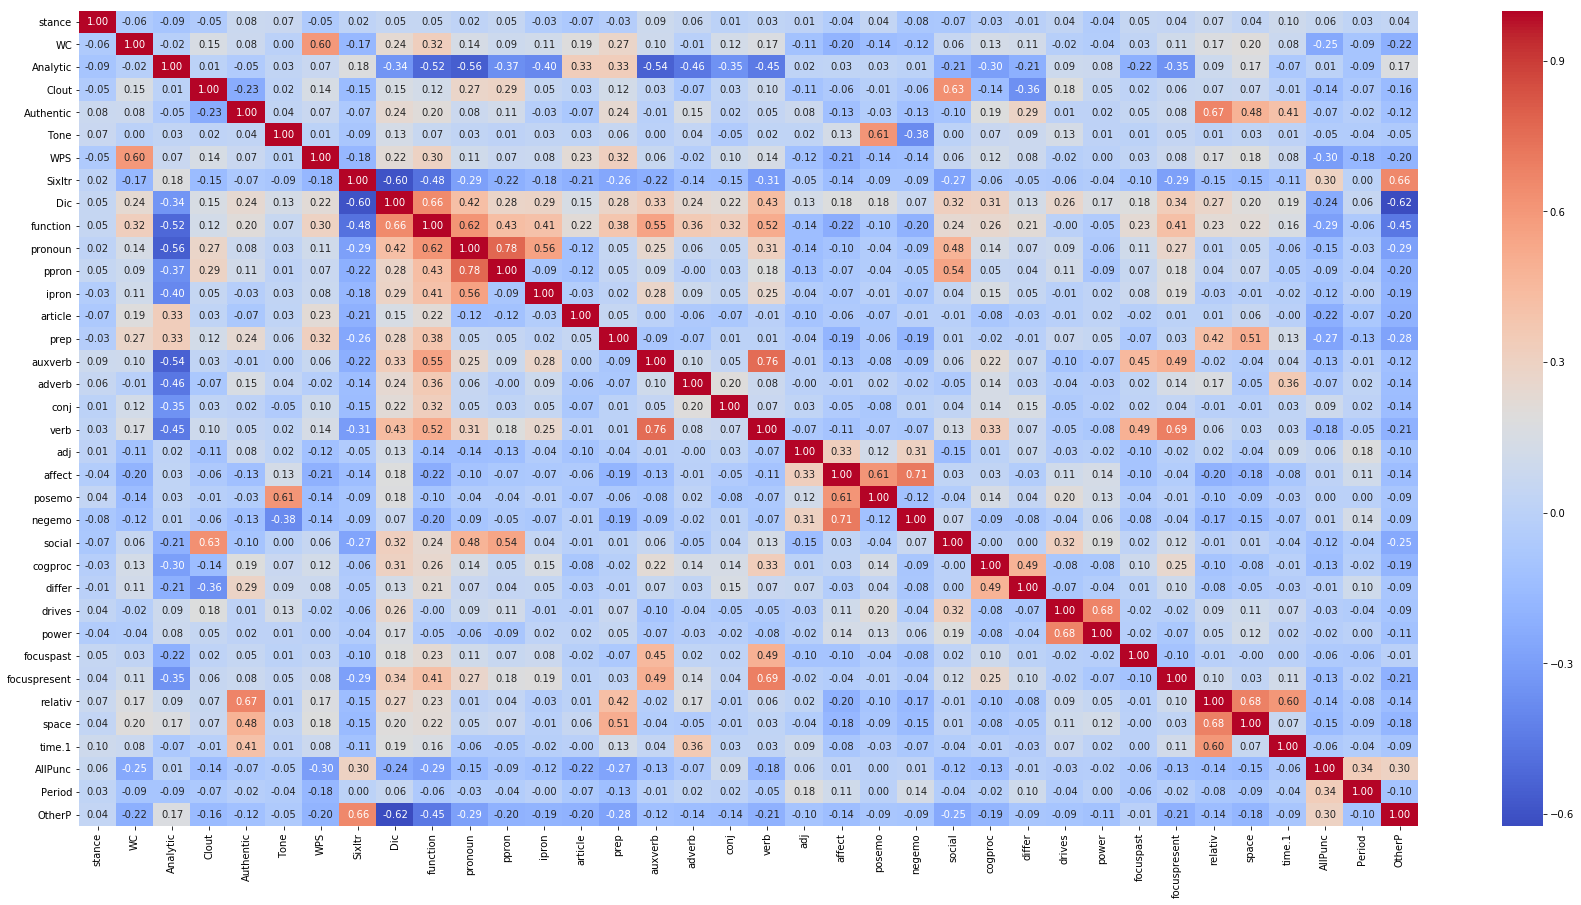

In [142]:
col2=['stance','WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
       'ppron', 'i', 'you', 'shehe', 'they', 'ipron', 'article', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare',
       'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo',
       'anger', 'social', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'bio',
       'drives', 'affiliation', 'achieve', 'power', 'reward', 'focuspast',
       'focuspresent', 'focusfuture', 'relativ', 'motion', 'space',
       'time.1', 'work', 'informal', 'AllPunc', 'Period', 'Comma',
       'QMark', 'Exclam', 'Apostro', 'OtherP']
ling=All0[col2]
ling.astype(bool).sum(axis=0)
ling0=ling.drop(ling.columns[ling.apply(lambda col:col.astype(bool).sum(axis=0)<200)],axis=1) #delete columns with number of values below 200
ling.astype(bool).sum(axis=0)
len(ling0.columns)
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(ling0.corr(),annot=True,fmt='.2f',cmap='coolwarm')

### Mixed features: user+network, user+ling,network+ling

In [265]:
dict={4:'Strong Agreement',3:'Weak Agreement',2:'Neutral',1:'Weak Disagreement',0:'Strong Disagreement'}
user0['stance']=user0['stance'].map(dict)

In [299]:
# user+network

dict={4:'Strong Agreement',3:'Weak Agreement',2:'Neutral',1:'Weak Disagreement',0:'Strong Disagreement'}
user0['stance']=user0['stance'].map(dict)
network0['stance']=network0['stance'].map(dict)
user_net=pd.concat([user0.drop('stance',axis=1),network0],axis=1)
user_net.shape#(661, 23)
# user_net.columns
user_net['stance'].head()

0              Neutral
1    Weak Disagreement
2       Weak Agreement
3              Neutral
4              Neutral
Name: stance, dtype: object

In [301]:
user_ling['stance'].head()

0              Neutral
1    Weak Disagreement
2       Weak Agreement
3              Neutral
4              Neutral
Name: stance, dtype: object

In [145]:
ling0['stance']=ling0['stance'].map(dict)
user_ling=pd.concat([user0.drop('stance',axis=1),ling0],axis=1)
user_ling.shape#(661, 53)
# user_ling.columns

(661, 53)

In [146]:
network_ling=pd.concat([network0.drop('stance',axis=1),ling0],axis=1)
network_ling.shape#(661, 41)
# network_ling.columns

(661, 41)

In [147]:
all_feat=pd.concat([user_net.drop('stance',axis=1),ling0],axis=1)
all_feat.shape#(661, 58)

(661, 58)

### Mixed feature:All features

## Cycling through different models to see which performs the best: random_state will be set

In [ ]:
# evaluate several machine learning models by training on trainng set and testing on testing set
def evaluate(X_train,X_test,y_train, y_test):
# name of models
    model_name_list=['Linear Regression','ElasticNet Regression', 'Random Forest','Extra Trees','SVM','Gradient Boosted','Baseline']
    #instantiate the models
    model1=LinearRegression()
    model2=ElasticNet(alpha=1,l1_ratio=0.5)
    model3=RandomForestRegressor(n_estimators=50)
    model4=ExtraTreesRegressor(n_estimators=50)
    model5=SVR(kernel='rbf',degree=3,C=1,gamma='auto')
    model6=GradientBoostingRegressor(n_estimators=20)
    #dataframe for results
    results=pd.DataFrame(columns=['mae','rmse'],index=model_name_list)
    
    #train and predict with each model
    for i, model in enumerate([model1,model2, model3,model4,model5,model6]):
        model.fit(X_train, y_train)
        predictions=model.predict(X_test)
        #metrics
        mae=np.mean(abs(predictions-y_test))
        rmse=np.sqrt(np.mean((predictions-y_test)**2))
        
        #insert results into the dataframe
        model_name=model_name_list[i]
        results.ix[model_name,:]=[mae,rmse]
        
    #median value baseline metrics
    baseline=np.median(y_train)
    baseline_mae=np.mean(abs(baseline-y_test))
    baseline_rmse=np.sqrt(np.mean((baseline-y_test)**2))
    results.ix['Baseline',:]=[baseline_mae,baseline_rmse]
    return results

## Concatenate categories

In [18]:
All0=pd.read_csv('All_3BC.csv')#114 columns
np.array(All0.columns)

array(['screen_name', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'topic', 'stance', 'publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2', 'scaled_followers',
       'scaled_friends', 'influence', 'weighted_influence', 'cluster',
       'clustering_coeff', 'degree_centrality', 'closeness_centrality',
       'follows_Trump', 'cycle', 'triangles', 'WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
       'ppron', 'i', 'you', 'shehe', 'they', 'ipron', 'article', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare',
       'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo',
       'anger', 'social', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'bio',
       'drives', 'affili

In [19]:
All0['topic'].value_counts()

colton     125
cnn        110
FBI        105
march      103
hiring      98
backer      61
coached     59
Name: topic, dtype: int64

In [20]:
pd.crosstab(index=All0['topic'],columns=All0['stance'])

stance   Neutral  Strong Agreement  Strong Disagreement  Weak Agreement  \
topic                                                                     
FBI           29                37                   29               8   
backer        31                13                    2              13   
cnn           76                 7                    9               5   
coached       12                24                   11              10   
colton        16                93                    1              14   
hiring        14                22                   31              17   
march         12                35                   22              13   

stance   Weak Disagreement  
topic                       
FBI                      2  
backer                   2  
cnn                     13  
coached                  2  
colton                   1  
hiring                  14  
march                   21

In [21]:
backer=All0[All0['topic']=='backer']
cnn=All0[All0['topic']=='cnn']
colton=All0[All0['topic']=='colton']
coached=All0[All0['topic']=='coached']
FBI=All0[All0['topic']=='FBI']
hiring=All0[All0['topic']=='hiring']
march=All0[All0['topic']=='march']
backer.shape

(61, 116)

In [48]:
col0=['screen_name', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'topic', 'stance', 'publishing_days',
       'membership_years', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2']
cnn_user=cnn[col0]
cnn_user.head()
x11=cnn_user.drop(['screen_name', 'location', 'description','topic', 'stance'],axis=1)
y11=cnn_user['stance']
X_train11,X_test11,y_train11,y_test11=train_test_split(x11,y11,test_size=0.3,random_state=33)

In [31]:
X_train11.columns

Index(['followers_count', 'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'publishing_days', 'membership_years', 'cnn', 'cnn',
       'pubd_5', 'pubd_6', 'pubd_7', 'pubd_38', 'pubd_39', 'memb_1', 'memb_2'],
      dtype='object')

In [73]:
col0=['screen_name', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count',  'stance', 'publishing_days',
       'membership_years', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2']
backer_user=backer[col0]
backer_user.head()
x11=backer_user.drop(['screen_name', 'location', 'description', 'stance'],axis=1)
y11=backer_user['stance']
X_train11,X_test11,y_train11,y_test11=train_test_split(x11,y11,test_size=0.4,random_state=43)

In [75]:
y_train11.unique()

array(['Strong Agreement', 'Weak Agreement', 'Neutral',
       'Weak Disagreement', 'Strong Disagreement'], dtype=object)

In [ ]:
backer_user['stance'].value_counts()
FBI_user['stance'].value_counts()
y_test11['stance'].value_counts()

In [ ]:
clf = XGBClassifier(
                 learning_rate =0.1,
                 n_estimators=200,
                 max_depth=5,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective='multi:softmax',
                 n_jobs=4,
                 scale_pos_weight=1,
                 reg_alpha=0,
                 reg_lambda=1,
                 seed=44)#44
clf.fit(X_train11,y_train11)
pred=clf.predict(X_test11)
error_rate=np.sum(pred!=y_test11)/y_test11.shape[0]
# print ('test error using softmax={}'.format(error_rate))



cm=confusion_matrix(y_test11,pred)
cm=pd.DataFrame(cm,columns=['Predicted Neutral','Predicted SA','Predicted SD','Predicted WA','Predicted WD'],index=['Actual Neutral Cases','Actual SA Cases','Actual SD Cases','Actual WA Cases','Actual WD Cases'])
cm

print(classification_report(y_test11,pred,target_names=['Neutral','Strong Agreement(SA)','Strong Disagreement(SD)','Weak Agreement(WA)','Weak Disagreement']))
# cm

In [38]:
cm

Predicted Neutral  Predicted SA  Predicted SD  \
Actual Neutral Cases                  0             4             0   
Actual SA Cases                       2            23             0   
Actual SD Cases                       1             0             0   
Actual WA Cases                       1             5             0   
Actual WD Cases                       0             1             0   

                      Predicted WA  Predicted WD  
Actual Neutral Cases             0             0  
Actual SA Cases                  1             0  
Actual SD Cases                  0             0  
Actual WA Cases                  0             0  
Actual WD Cases                  0             0

### strong agreement vs rest

In [359]:


dict={4:'Strong Agreement',3:'Weak Agreement',2:'Neutral',1:'Weak Disagreement',0:'Strong Disagreement'}
All0['stance']=All0['stance'].map(dict)
All0.head()

screen_name  location  description  followers_count  friends_count  \
0          Wesmoms         0            0             1957           2118   
1        nerbonnej         0            0             5440           5073   
2           jjd_53         1            1              188             40   
3  freedom_girlbot         1            0             8587           5489   
4      spectre2012         1            0              168             74   

   listed_count  favorites_count  statuses_count   topic             stance  \
0             1            15054           19454  backer            Neutral   
1             3             7350            4807  backer  Weak Disagreement   
2             2            28744           11073  backer     Weak Agreement   
3             7            15526            6992  backer            Neutral   
4             6              620            3618  backer            Neutral   

        ...        friends_611_2294  friends_2294  favorites_2_1624  \
0       ...                       1             0                 0   
1       ...                       0             1                 0   
2       ...                       0             0                 0   
3       ...                       0             1                 0   
4       ...                       0             0                 1   

   favorites_1624_6669  favorites_6669_18559  favorites_18559  \
0                    0                     1                0   
1                    0                     1                0   
2                    0                     0                1   
3                    0                     1                0   
4                    0                     0                0   

   statuses_4_2439  statuses_2439_7860  statuses_7860_19424  statuses_19424  
0                0                   0                    0               1  
1                0                   1                    0               0  
2                0                   0                    1               0  
3                0                   1                    0               0  
4                0                   1                    0               0  

[5 rows x 113 columns]

In [364]:
# All0.to_csv('all_bc_cat.csv',index=False)
All0['label']=np.where(All0['stance']=='Strong Agreement', 'Strong Agreement','Not_SA')
All0['label'].value_counts()

All0['Class']=np.where(All0['stance']=='Strong Disagreement', 'Strong Disagreement','Not_SD')
All0['Class'].value_counts()

All0.to_csv('all_multi_class.csv',index=False)

Not_SA              430
Strong Agreement    231
Name: label, dtype: int64

In [379]:
All1.columns

Index(['screen_name', 'location', 'description', 'listed_count',
       'statuses_count', 'topic', 'pubd_5', 'pubd_6', 'pubd_39', 'memb_2',
       'scaled_followers', 'influence', 'weighted_influence',
       'clustering_coeff', 'closeness_centrality', 'cycle', 'i', 'you',
       'shehe', 'they', 'negate', 'compare', 'interrog', 'number', 'quant',
       'anger', 'male', 'insight', 'cause', 'discrep', 'tentat', 'certain',
       'percept', 'see', 'bio', 'affiliation', 'achieve', 'reward',
       'focusfuture', 'motion', 'work', 'informal', 'Comma', 'QMark', 'Exclam',
       'Apostro', 'followers_85_454', 'followers_454_1921', 'friends_192_611',
       'friends_611_2294', 'favorites_1624_6669', 'favorites_6669_18559',
       'statuses_2439_7860', 'statuses_7860_19424', 'statuses_19424', 'label',
       'Class'],
      dtype='object')

In [375]:
feat=pd.Series(list(all_feat.columns))
# feat.to_csv('all_feat.csv')
# feat
All1=All0.drop(feat,axis=1)
All1.head()

screen_name  location  description  listed_count  statuses_count  \
0          Wesmoms         0            0             1           19454   
1        nerbonnej         0            0             3            4807   
2           jjd_53         1            1             2           11073   
3  freedom_girlbot         1            0             7            6992   
4      spectre2012         1            0             6            3618   

    topic  pubd_5  pubd_6  pubd_39  memb_2   ...    followers_454_1921  \
0  backer       0       0        0       0   ...                     0   
1  backer       0       0        0       0   ...                     0   
2  backer       0       0        0       0   ...                     0   
3  backer       0       0        0       0   ...                     0   
4  backer       0       0        0       0   ...                     0   

   friends_192_611  friends_611_2294  favorites_1624_6669  \
0                0                 1                    0   
1                0                 0                    0   
2                0                 0                    0   
3                0                 0                    0   
4                0                 0                    0   

   favorites_6669_18559  statuses_2439_7860  statuses_7860_19424  \
0                     1                   0                    0   
1                     1                   1                    0   
2                     0                   0                    1   
3                     1                   1                    0   
4                     0                   1                    0   

   statuses_19424   label   Class  
0               1  Not_SA  Not_SD  
1               0  Not_SA  Not_SD  
2               0  Not_SA  Not_SD  
3               0  Not_SA  Not_SD  
4               0  Not_SA  Not_SD  

[5 rows x 57 columns]

In [383]:
X_train8.columns

Index(['screen_name', 'location', 'description', 'listed_count',
       'statuses_count', 'topic', 'pubd_5', 'pubd_6', 'pubd_39', 'memb_2',
       'scaled_followers', 'influence', 'weighted_influence',
       'clustering_coeff', 'closeness_centrality', 'cycle', 'i', 'you',
       'shehe', 'they', 'negate', 'compare', 'interrog', 'number', 'quant',
       'anger', 'male', 'insight', 'cause', 'discrep', 'tentat', 'certain',
       'percept', 'see', 'bio', 'affiliation', 'achieve', 'reward',
       'focusfuture', 'motion', 'work', 'informal', 'Comma', 'QMark', 'Exclam',
       'Apostro', 'followers_85_454', 'followers_454_1921', 'friends_192_611',
       'friends_611_2294', 'favorites_1624_6669', 'favorites_6669_18559',
       'statuses_2439_7860', 'statuses_7860_19424', 'statuses_19424', 'label'],
      dtype='object')

In [386]:
x8=All1.drop(['Class','screen_name', 'location', 'description','topic','label' ],axis=1)
y8=All1['label']
X_train8,X_test8,y_train8,y_test8=train_test_split(x8,y8,test_size=0.3,random_state=0)
X_train8.shape#(482, 51), with outlier 880


(462, 51)

In [388]:
clf = XGBClassifier(
                 learning_rate =0.1,
                 n_estimators=200,
                 max_depth=5,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective='binary:logistic',
                 n_jobs=4,
                 scale_pos_weight=1,
                 reg_alpha=0,
                 reg_lambda=1,
                 seed=0)
clf.fit(X_train8,y_train8)
pred=clf.predict(X_test8)
error_rate=np.sum(pred!=y_test8)/y_test8.shape[0]
print ('test error using softmax={}'.format(error_rate))

pd.Series(pred).value_counts()

cm=confusion_matrix(y_test8,pred)
cm=pd.DataFrame(cm,columns=['Predicted Not_SA','Predicted SA'],index=['Actual Not_SA Cases','Actual SA Cases'])
cm
print(classification_report(y_test8,pred,target_names=['Not_SA','Strong Agreement(SA)']))

test error using softmax=0.3165829145728643


In [394]:

import_feat=clf.feature_importances_
coefficients=pd.concat([pd.DataFrame(x8.columns,columns=['predictors']),pd.DataFrame(np.transpose(import_feat),columns=['Feature_importance'])],axis=1)
coefficients.sort_values('Feature_importance',ascending=False).head(20)

predictors  Feature_importance
10  closeness_centrality            0.109168
1         statuses_count            0.093817
7              influence            0.090405
6       scaled_followers            0.068657
9       clustering_coeff            0.066951
8     weighted_influence            0.061834
0           listed_count            0.046482
38                 Comma            0.031557
23               insight            0.025586
36                  work            0.022601
28               percept            0.020896
17               compare            0.020469
35                motion            0.020469
13                   you            0.020043
40                Exclam            0.018763
25               discrep            0.017058
16                negate            0.015778
31           affiliation            0.014072
22                  male            0.013646
26                tentat            0.013646

### Strong Disagreement vs. Not SD

In [395]:
x9=All1.drop(['Class','screen_name', 'location', 'description','topic','label' ],axis=1)
y9=All1['Class']
X_train9,X_test9,y_train9,y_test9=train_test_split(x9,y9,test_size=0.3,random_state=0)
X_train9.shape#(462, 51), with outlier 990


(462, 51)

In [411]:
clf = XGBClassifier(
                 learning_rate =0.1,
                 n_estimators=200,
                 max_depth=5,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective='binary:logistic',
                 n_jobs=4,
                 scale_pos_weight=1,
                 reg_alpha=0,
                 reg_lambda=1,
                 seed=0)
clf.fit(X_train9,y_train9)
pred=clf.predict(X_test9)
error_rate=np.sum(pred!=y_test9)/y_test9.shape[0]
print ('test error using softmax={}'.format(error_rate))

cm=confusion_matrix(y_test9,pred)
cm=pd.DataFrame(cm,columns=['Predicted Not_SD','Predicted SD'],index=['Actual Not_SD Cases','Actual SD Cases'])
cm
print(classification_report(y_test9,pred,target_names=['Not_SD','Strong Disagreement(SD)']))

test error using softmax=0.19597989949748743
                         precision    recall  f1-score   support

                 Not_SD       0.84      0.95      0.89       167
Strong Disagreement(SD)       0.18      0.06      0.09        32

              micro avg       0.80      0.80      0.80       199
              macro avg       0.51      0.50      0.49       199
           weighted avg       0.73      0.80      0.76       199



In [529]:
# it will cause big imbalance issue, we should do neutral, strong agreement, strong disagreement

dict={'Strong Agreement':'Agreement','Weak Agreement':'Agreement','Neutral':'Neutral','Weak Disagreement':'Disagreement',
      'Strong Disagreement':'Disagreement'}
# Al
All0['label2']=All0['stance'].map(dict)
All0.head()

screen_name  location  description  followers_count  friends_count  \
0          Wesmoms         0            0             1957           2118   
1        nerbonnej         0            0             5440           5073   
2           jjd_53         1            1              188             40   
3  freedom_girlbot         1            0             8587           5489   
4      spectre2012         1            0              168             74   

   listed_count  favorites_count  statuses_count   topic             stance  \
0             1            15054           19454  backer            Neutral   
1             3             7350            4807  backer  Weak Disagreement   
2             2            28744           11073  backer     Weak Agreement   
3             7            15526            6992  backer            Neutral   
4             6              620            3618  backer            Neutral   

       ...       favorites_1624_6669  favorites_6669_18559  favorites_18559  \
0      ...                         0                     1                0   
1      ...                         0                     1                0   
2      ...                         0                     0                1   
3      ...                         0                     1                0   
4      ...                         0                     0                0   

   statuses_4_2439  statuses_2439_7860  statuses_7860_19424  statuses_19424  \
0                0                   0                    0               1   
1                0                   1                    0               0   
2                0                   0                    1               0   
3                0                   1                    0               0   
4                0                   1                    0               0   

    label   Class        label2  
0  Not_SA  Not_SD       Neutral  
1  Not_SA  Not_SD  Disagreement  
2  Not_SA  Not_SD     Agreement  
3  Not_SA  Not_SD       Neutral  
4  Not_SA  Not_SD       Neutral  

[5 rows x 116 columns]

### SA+WA vs Rest

In [531]:
All0.to_csv('All_3BC.csv',index=False)

In [533]:
np.array(All0.columns)

array(['screen_name', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'topic', 'stance', 'publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2', 'scaled_followers',
       'scaled_friends', 'influence', 'weighted_influence', 'cluster',
       'clustering_coeff', 'degree_centrality', 'closeness_centrality',
       'follows_Trump', 'cycle', 'triangles', 'WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
       'ppron', 'i', 'you', 'shehe', 'they', 'ipron', 'article', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare',
       'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo',
       'anger', 'social', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'bio',
       'drives', 'affili

In [539]:
# All2=All0.drop(feat,axis=1)
x10=All2.drop(['screen_name', 'location', 'description','label','topic',
       'Class', 'label2'],axis=1)
y10=All2['label2']
X_train10,X_test10,y_train10,y_test10=train_test_split(x10,y10,test_size=0.3,random_state=0)
X_train10.shape#(462, 51)


(462, 51)

In [544]:
clf = XGBClassifier(
                 learning_rate =0.1,
                 n_estimators=200,
                 max_depth=5,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective='binary:logistic',
                 n_jobs=4,
                 scale_pos_weight=1,
                 reg_alpha=0,
                 reg_lambda=1,
                 seed=0)
clf.fit(X_train10,y_train10)
pred=clf.predict(X_test10)
error_rate=np.sum(pred!=y_test10)/y_test10.shape[0]
print ('test error using softmax={}'.format(error_rate))

cm=confusion_matrix(y_test10,pred)
cm=pd.DataFrame(cm,columns=['Predicted Agreement','Neutral','Predicted Disagreement'],index=['Actual Agreement Cases','Neutral','Actual Disagreement Cases'])
cm
print(classification_report(y_test10,pred,target_names=['Agreement','Neutral','Disagreement']))

test error using softmax=0.5326633165829145
              precision    recall  f1-score   support

   Agreement       0.53      0.69      0.60        93
     Neutral       0.42      0.30      0.35        53
Disagreement       0.33      0.25      0.28        53

   micro avg       0.47      0.47      0.47       199
   macro avg       0.42      0.41      0.41       199
weighted avg       0.45      0.47      0.45       199



In [543]:
pred=pd.Series(pred)
pred.value_counts()

Agreement       121
Neutral          40
Disagreement     38
dtype: int64

In [547]:
rf=RandomForestClassifier(min_samples_split=4,random_state=10)
Max_features=range(1,11)
param_rf={'max_features': Max_features}
rand_rf=RandomizedSearchCV(rf,param_rf,n_iter=10,scoring='accuracy',cv=10,random_state=33)
rand_rf.fit(X_train10,y_train10)
rf_predict=rand_rf.predict(X_test10)
rf_predict=pd.Series(rf_predict)
rf_predict.value_counts()
cm=confusion_matrix(y_test10,rf_predict)
cm=pd.DataFrame(cm,columns=['Predicted Agreement','Neutral','Predicted Disagreement'],index=['Actual Agreement Cases','Neutral','Actual Disagreement Cases'])
cm
# y_test.value_counts()
print(classification_report(y_test10,rf_predict,target_names=['Agreement','Neutral','Disagreement']))

              precision    recall  f1-score   support

   Agreement       0.54      0.74      0.63        93
     Neutral       0.44      0.28      0.34        53
Disagreement       0.34      0.25      0.29        53

   micro avg       0.49      0.49      0.49       199
   macro avg       0.44      0.42      0.42       199
weighted avg       0.46      0.49      0.46       199



In [552]:
x11=user0.drop('stance',axis=1)
y11=All2['label2']
X_train11,X_test11,y_train11,y_test11=train_test_split(x11,y11,test_size=0.3,random_state=0)
X_train11.shape#(462, 17)


(462, 17)

In [553]:
rf=RandomForestClassifier(min_samples_split=4,random_state=11)
Max_features=range(1,17)
param_rf={'max_features': Max_features}
rand_rf=RandomizedSearchCV(rf,param_rf,n_iter=10,scoring='accuracy',cv=10,random_state=33)
rand_rf.fit(X_train11,y_train11)
rf_predict=rand_rf.predict(X_test11)
rf_predict=pd.Series(rf_predict)
rf_predict.value_counts()
cm=confusion_matrix(y_test11,rf_predict)
cm=pd.DataFrame(cm,columns=['Predicted Agreement','Neutral','Predicted Disagreement'],index=['Actual Agreement Cases','Neutral','Actual Disagreement Cases'])
cm
# y_test.value_counts()
print(classification_report(y_test11,rf_predict,target_names=['Agreement','Neutral','Disagreement']))

              precision    recall  f1-score   support

   Agreement       0.56      0.69      0.62        93
     Neutral       0.37      0.21      0.27        53
Disagreement       0.47      0.49      0.48        53

   micro avg       0.51      0.51      0.51       199
   macro avg       0.47      0.46      0.45       199
weighted avg       0.49      0.51      0.49       199



In [554]:
dt=DecisionTreeClassifier(min_samples_split=4,class_weight='balanced',random_state=11)
Max_features=range(1,11)
param_dt={'max_features':Max_features}
rand_dt=RandomizedSearchCV(dt,param_dt,n_iter=10,scoring='accuracy',cv=10,random_state=33)
rand_dt.fit(X_train11,y_train11)
dt_predict=rand_dt.predict(X_test11)

dt_predict=pd.Series(dt_predict)
dt_predict.value_counts()
# dt_predict.value_counts()
cm=confusion_matrix(y_test11,dt_predict)
cm=pd.DataFrame(cm,columns=['Predicted Agreement','Neutral','Predicted Disagreement'],index=['Actual Agreement Cases','Neutral','Actual Disagreement Cases'])
cm
# y_test.value_counts()
print(classification_report(y_test11,dt_predict,target_names=['Agreement','Neutral','Disagreement']))

              precision    recall  f1-score   support

   Agreement       0.58      0.45      0.51        93
     Neutral       0.37      0.38      0.37        53
Disagreement       0.40      0.55      0.46        53

   micro avg       0.46      0.46      0.46       199
   macro avg       0.45      0.46      0.45       199
weighted avg       0.48      0.46      0.46       199



### Agreement vs disagreement

In [3]:
All0=pd.read_csv('All_3BC.csv')
All0['label2'].unique()

array(['Neutral', 'Disagreement', 'Agreement'], dtype=object)

In [41]:
All3=All0[All0['label2']!='Neutral']
All3['label2'].unique()

array(['Disagreement', 'Agreement'], dtype=object)

In [42]:

len(All3.columns)#116
pd.crosstab(index=All3['label2'],columns='percentage').apply(lambda r: round(r/len(All3),2)*100,axis=1).reset_index()

col_0        label2  percentage
0         Agreement        66.0
1      Disagreement        34.0

In [6]:
np.array(All3.columns)

array(['screen_name', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'topic', 'stance', 'publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2', 'scaled_followers',
       'scaled_friends', 'influence', 'weighted_influence', 'cluster',
       'clustering_coeff', 'degree_centrality', 'closeness_centrality',
       'follows_Trump', 'cycle', 'triangles', 'WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
       'ppron', 'i', 'you', 'shehe', 'they', 'ipron', 'article', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare',
       'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo',
       'anger', 'social', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'bio',
       'drives', 'affili

In [43]:
x12,y12=All3[['followers_count',
       'friends_count', 'listed_count', 'favorites_count',
       'statuses_count','publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2']], All3['label2']
X_train12,X_test12,y_train12,y_test12=train_test_split(x12,y12,test_size=0.3,random_state=0)
X_train12.shape#(329, 16)

(329, 16)

#### XGBOOST

In [52]:
clf12 = XGBClassifier(
                 learning_rate =0.1,
                 n_estimators=200,
                 max_depth=5,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective='binary:logistic',
                 n_jobs=4,
                 scale_pos_weight=1,
                 reg_alpha=0,
                 reg_lambda=1,
                 seed=88)
clf12.fit(X_train12,y_train12)
pred12=clf12.predict(X_test12)
y_proba=clf12.predict_proba(X_test12)
error_rate=np.sum(pred!=y_test12)/y_test12.shape[0]
print ('test error using softmax={}'.format(error_rate))

cm=confusion_matrix(y_test12,pred)
cm=pd.DataFrame(cm,columns=['Predicted Agreement','Predicted Disagreement'],index=['Actual Agreement Cases','Actual Disagreement Cases'])
cm
print(classification_report(y_test12,pred,target_names=['Agreement','Disagreement']))

test error using softmax=0.2887323943661972
              precision    recall  f1-score   support

   Agreement       0.80      0.76      0.78        96
Disagreement       0.55      0.61      0.58        46

   micro avg       0.71      0.71      0.71       142
   macro avg       0.68      0.68      0.68       142
weighted avg       0.72      0.71      0.71       142



#### ROC and AUC curve

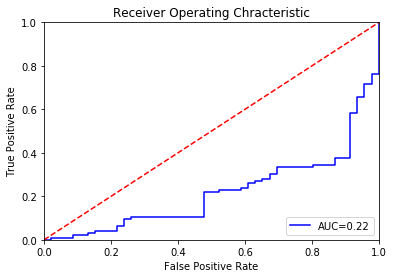

In [67]:

# Using matplotlib.pylot draw the plot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
preds=y_proba[:,1]
fpr,tpr,thresholds=roc_curve(y_test12,preds,pos_label='Agreement')#position label is the the class you want to calculate FPR, TPR for
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Chracteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test12,preds)#0.7810235507246377
# roc_auc_score

0.7810235507246377

In [11]:
import scikitplot as skplt

c:\users\tracy.shen\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


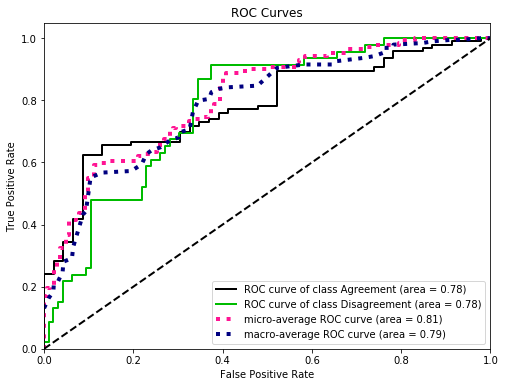

In [50]:
y_proba=clf12.predict_proba(X_test12)
skplt.metrics.plot_roc_curve(y_test12,y_proba,figsize=(8,6))
plt.show()

#### Decision Tree

In [98]:
dt=DecisionTreeClassifier(min_samples_split=2,class_weight='balanced',random_state=12)
Max_features=range(1,16)
param_dt={'max_features':Max_features}
rand_dt=RandomizedSearchCV(dt,param_dt,n_iter=10,scoring='accuracy',cv=10,random_state=33)
rand_dt.fit(X_train12,y_train12)
dt_predict=rand_dt.predict(X_test12)

dt_predict=pd.Series(dt_predict)
dt_predict.value_counts()
# dt_predict.value_counts()
cm=confusion_matrix(y_test12,dt_predict)
cm=pd.DataFrame(cm,columns=['Predicted Agreement','Predicted Disagreement'],index=['Actual Agreement Cases','Actual Disagreement Cases'])
cm
# y_test.value_counts()
print(classification_report(y_test12,dt_predict,target_names=['Agreement','Disagreement']))

              precision    recall  f1-score   support

   Agreement       0.79      0.71      0.75        96
Disagreement       0.50      0.61      0.55        46

   micro avg       0.68      0.68      0.68       142
   macro avg       0.65      0.66      0.65       142
weighted avg       0.70      0.68      0.68       142



C:\Users\tracy.shen\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Add New Features to improve model and use ROC AUC as a measure

In [17]:
user_t=pd.read_csv('useronly_4training.csv')
network_t=pd.read_csv('networkonly_4training.csv')
ling_t=pd.read_csv('lingonly_4training.csv')
user_network=pd.read_csv('network_user_4training.csv')
user_ling=pd.read_csv('user_ling_4training.csv')
network_ling=pd.read_csv('network_ling_4training.csv')
all_feat=pd.read_csv('all_merged_4training.csv')

In [7]:
import numpy as np

import pandas as pd

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
import scikitplot as skplt

In [1]:
# evaluate several machine learning models by training on trainng set and testing on testing set
def evaluate(X_train,X_test,y_train, y_test):
# name of models
    model_name_list=['KNN','Decision Tree', 'Random Forest','XGboost']
    #instantiate the models
    model1=KNeighborsClassifier()
    model2=DecisionTreeClassifier(min_samples_split=6,class_weight='balanced',random_state=0)
    model3=RandomForestClassifier(min_samples_split=6,random_state=0)
    model4=XGBClassifier(
                 learning_rate =0.01,
                 max_depth=4,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective='multi:softmax',
                 n_jobs=4,
                 scale_pos_weight=1,
                 reg_alpha=0,
                 reg_lambda=1,
                 seed=0)

    #dataframe for results
#     results=pd.DataFrame(columns=['y_proba'],index=model_name_list)
    
    #train and predict with each model
    for i, model in enumerate([model1,model2, model3,model4]):
        model.fit(X_train, y_train)
        y_proba=model.predict_proba(X_test)
        #metrics

        
        #insert results into the dataframe
#         model_name=model_name_list[i]
#         results.ix[model_name,:]=[y_proba]
        skplt.metrics.plot_roc_curve(y_test,y_proba,figsize=(8,6))
        plt.show
    
#     return results

### 1. user feature only

In [20]:
x=user_t.drop('stance',axis=1)
y=user_t['stance']
X_train0,X_test0,y_train0,y_test0=train_test_split(x,y,test_size=0.3,random_state=0)

y_train0.isnull().sum()

0

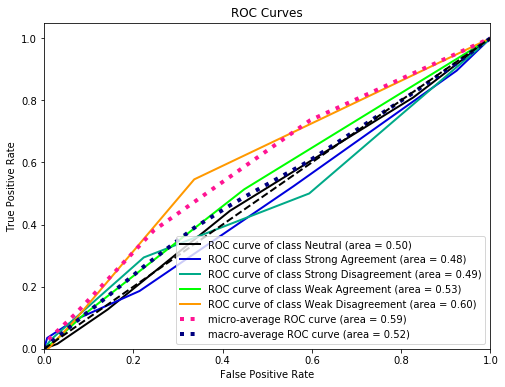

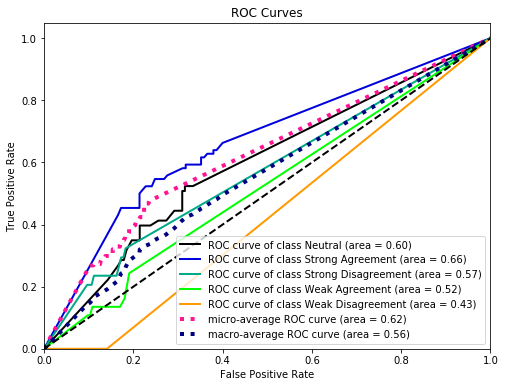

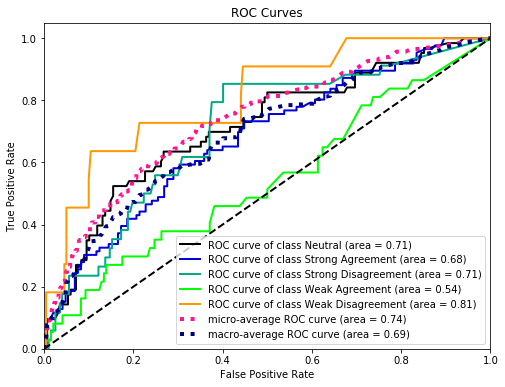

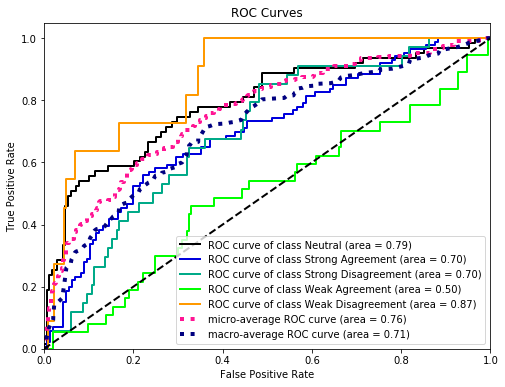

In [21]:
##updated
evaluate(X_train0,X_test0,y_train0,y_test0)
# with center node feature

### 2. network feature only

In [22]:
x=network_t.drop('stance',axis=1)
y=network_t['stance']
X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=0)

y_train1.isnull().sum()


0

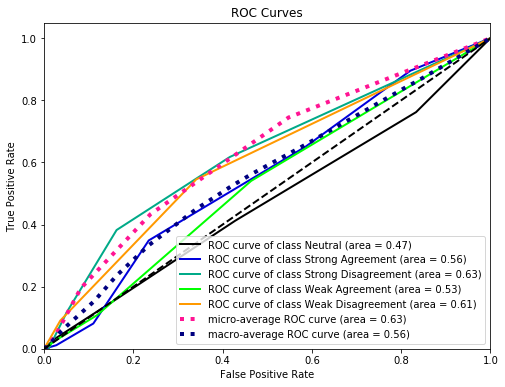

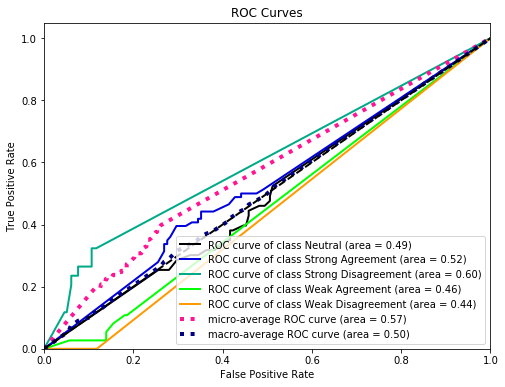

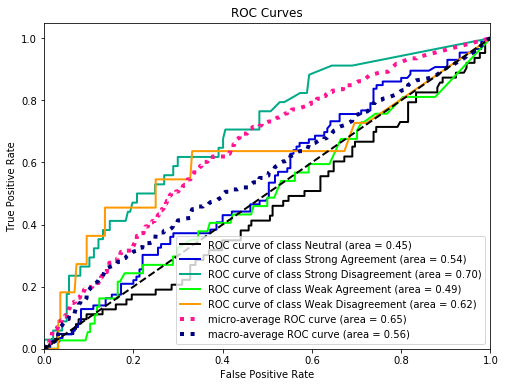

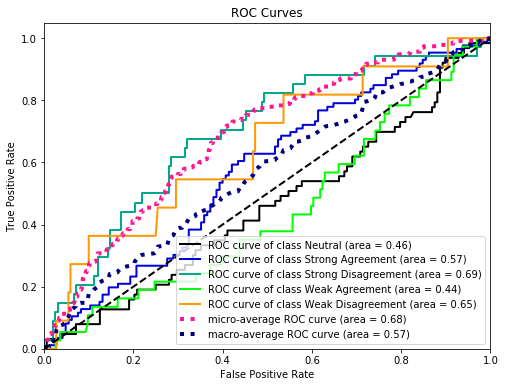

In [23]:
evaluate(X_train1,X_test1,y_train1,y_test1)
# updated# with center node feature

### 3. ling feature only

In [24]:
x=ling_t.drop('stance',axis=1)
y=ling_t['stance']
X_train2,X_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.3,random_state=0)

y_train2.isnull().sum()


0

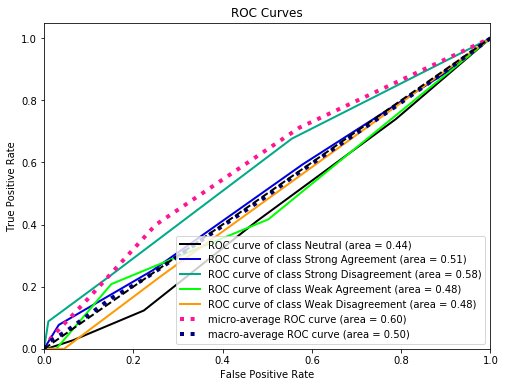

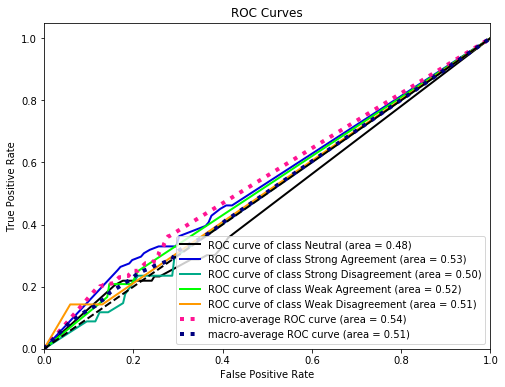

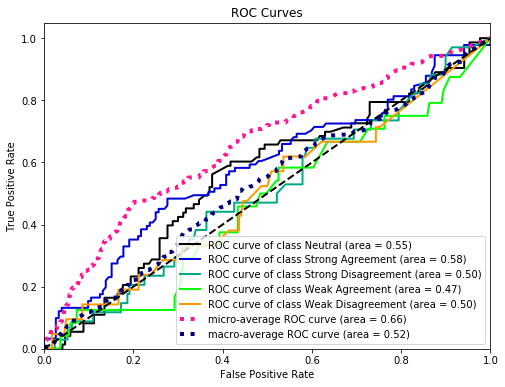

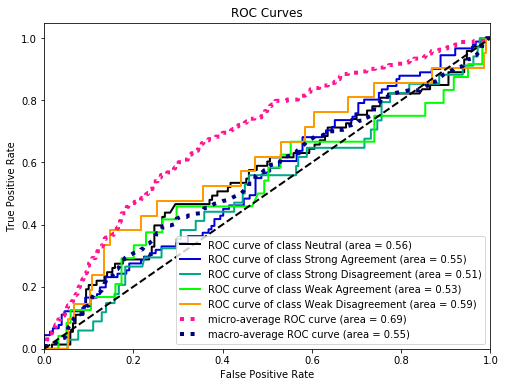

In [25]:
evaluate(X_train2,X_test2,y_train2,y_test2)
# with center node feature

### 4. user and network feature

In [26]:
x=user_network.drop('stance',axis=1)
y=user_network['stance']
X_train3,X_test3,y_train3,y_test3=train_test_split(x,y,test_size=0.3,random_state=0)

y_train3.isnull().sum()

0

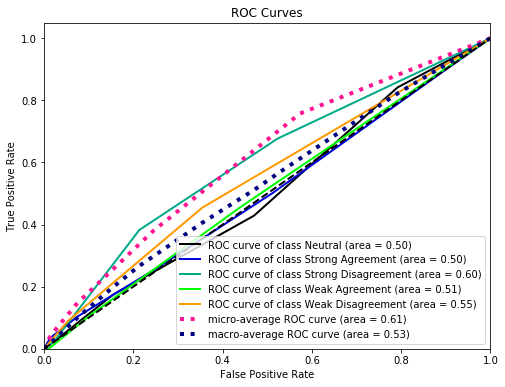

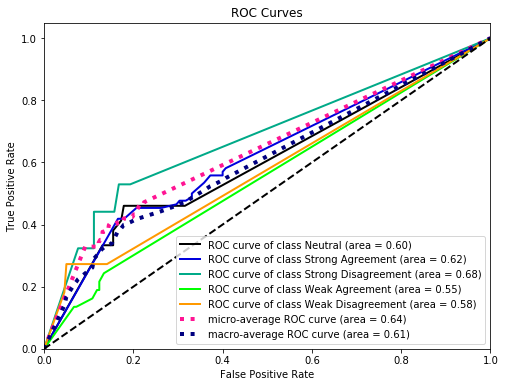

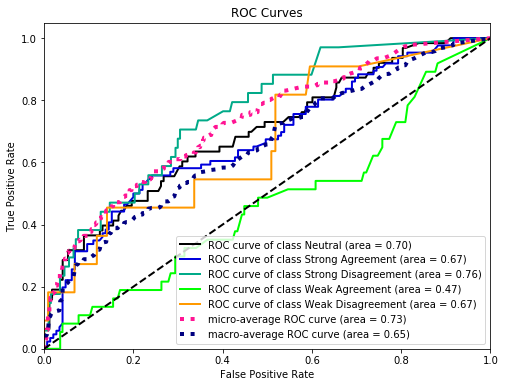

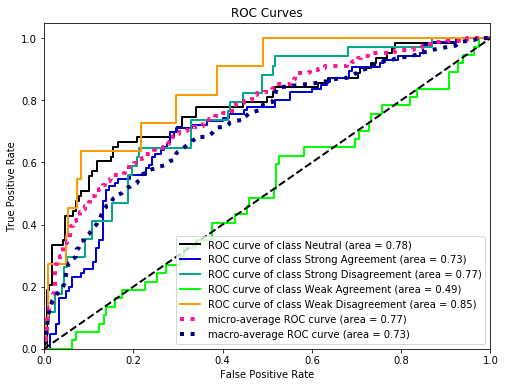

In [27]:
evaluate(X_train3,X_test3,y_train3,y_test3)
# updated# with center node feature

### 5. user and ling feature

In [28]:
x=user_ling.drop('stance',axis=1)
y=user_ling['stance']
X_train4,X_test4,y_train4,y_test4=train_test_split(x,y,test_size=0.3,random_state=0)

y_train4.isnull().sum()

0

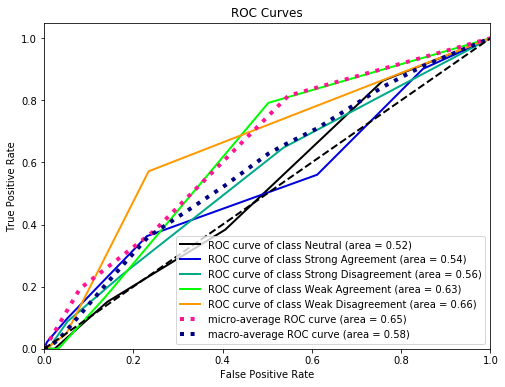

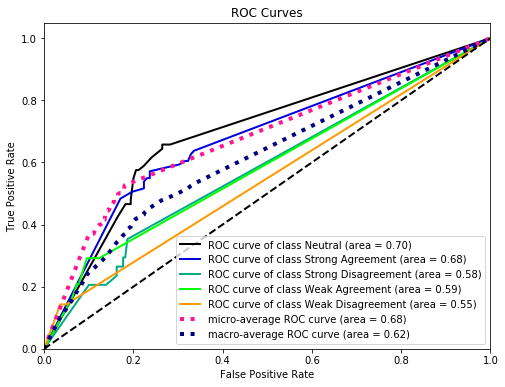

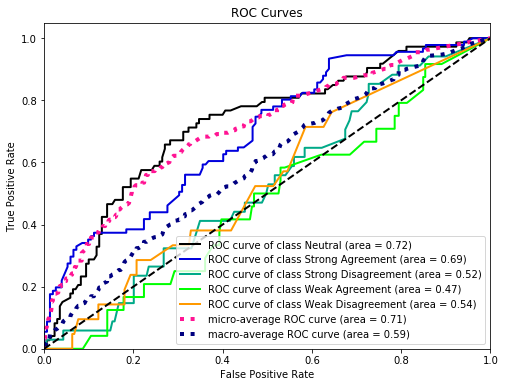

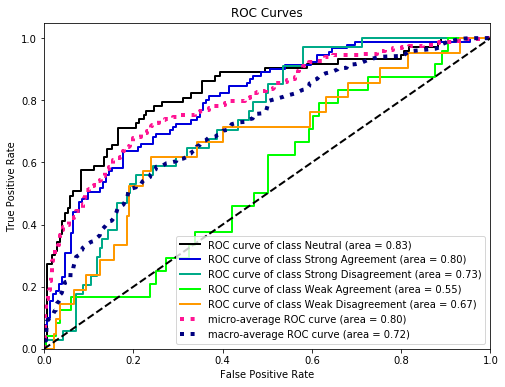

In [29]:
evaluate(X_train4,X_test4,y_train4,y_test4)
# updated# with center node feature

### 6. ling and network feature

In [30]:
x=network_ling.drop('stance',axis=1)
y=network_ling['stance']
X_train5,X_test5,y_train5,y_test5=train_test_split(x,y,test_size=0.3,random_state=0)

y_train5.isnull().sum()

0

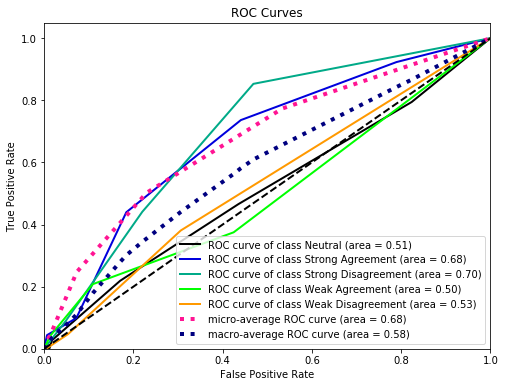

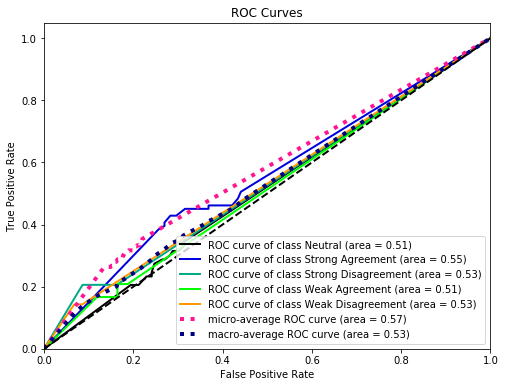

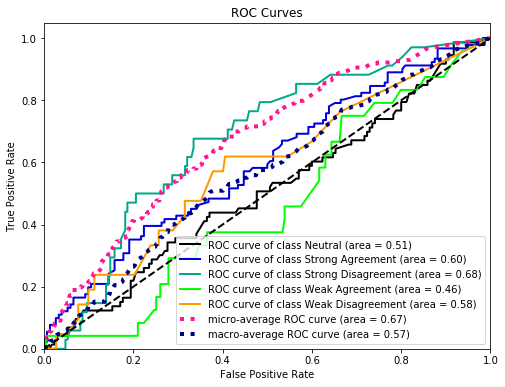

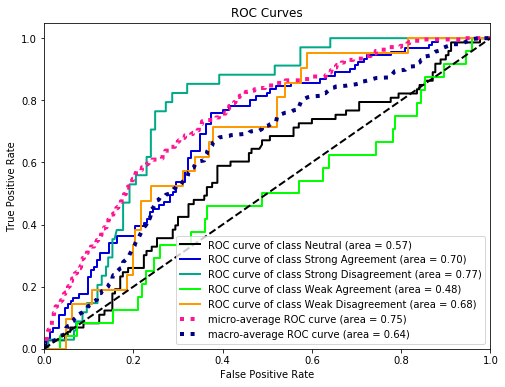

In [31]:
evaluate(X_train5,X_test5,y_train5,y_test5)
# with center node feature

### 7. all features

In [2]:
all_feat=pd.read_csv('all_merged_4training.csv')

In [3]:
x=all_feat.drop('stance',axis=1)
y=all_feat['stance']
X_train6,X_test6,y_train6,y_test6=train_test_split(x,y,test_size=0.3,random_state=0)

y_train6.isnull().sum()

0

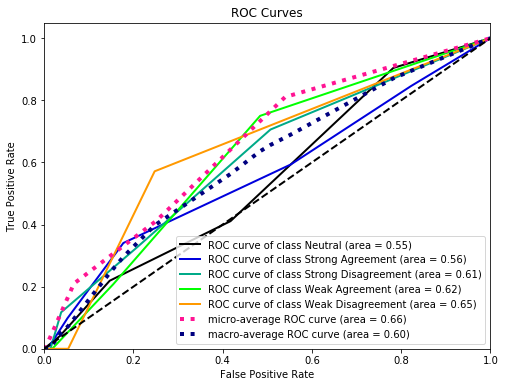

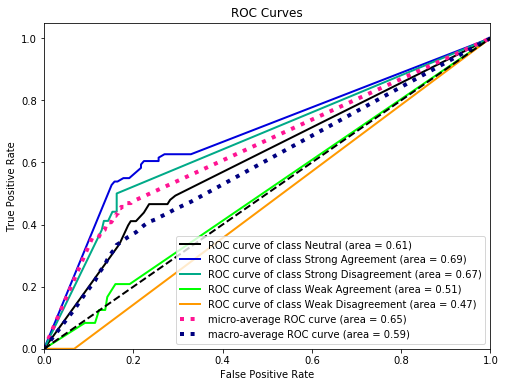

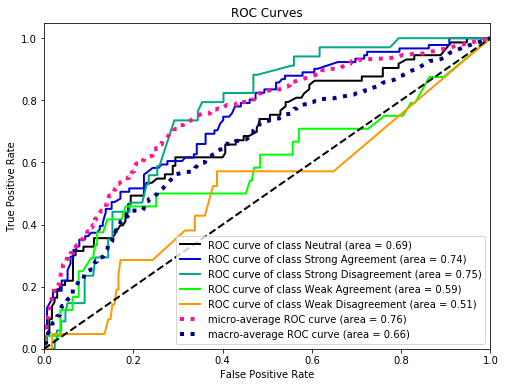

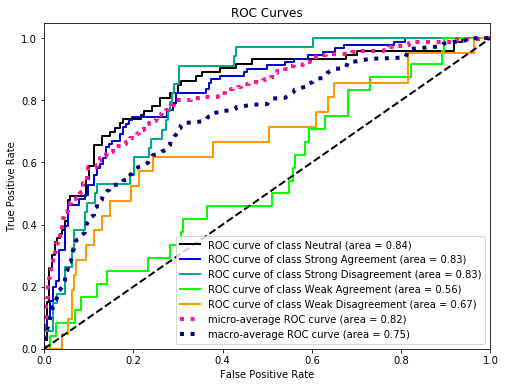

In [33]:
evaluate(X_train6,X_test6,y_train6,y_test6)
# with center node feature

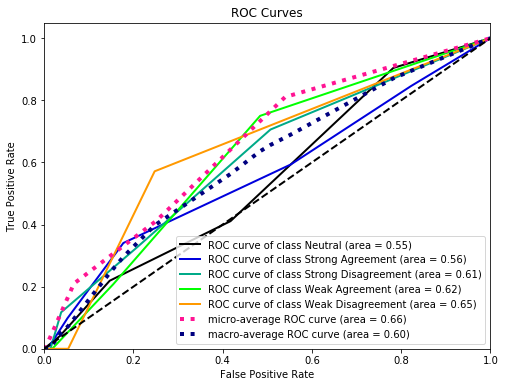

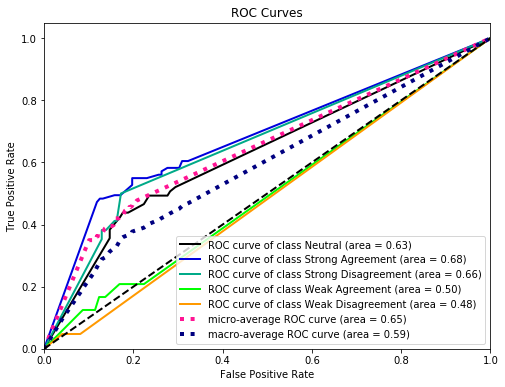

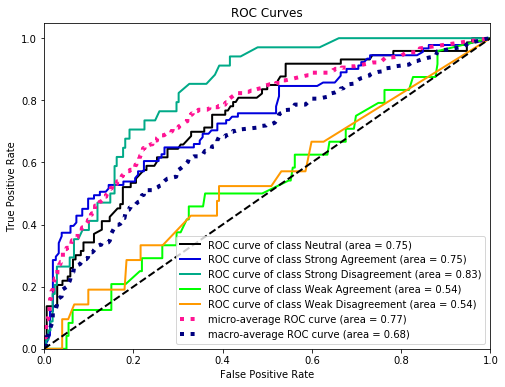

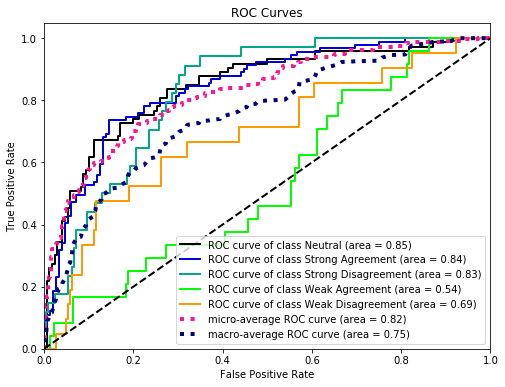

In [86]:
evaluate(X_train6,X_test6,y_train6,y_test6)

### print out results for XGBoost for all feature model

In [22]:
clf = XGBClassifier(
                 learning_rate =0.01,
                 max_depth=4,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective='multi:softmax',
                 n_jobs=4,
                 scale_pos_weight=1,
                 reg_alpha=0,
                 reg_lambda=1,
                 seed=188)#also tried 0,44,100
clf.fit(X_train6,y_train6)
pred=clf.predict(X_test6)
y_proba6=clf.predict_proba(X_test6)
error_rate=np.sum(pred!=y_test6)/y_test6.shape[0]
# print ('test error using softmax={}'.format(error_rate))



cm=confusion_matrix(y_test6,pred)
cm=pd.DataFrame(cm,columns=['Predicted Neutral','Predicted SA','Predicted SD','Predicted WA','Predicted WD'],index=['Actual Neutral Cases','Actual SA Cases','Actual SD Cases','Actual WA Cases','Actual WD Cases'])
cm



Predicted Neutral  Predicted SA  Predicted SD  \
Actual Neutral Cases                 44            18            10   
Actual SA Cases                       7            72            10   
Actual SD Cases                       4            11            18   
Actual WA Cases                       2            15             6   
Actual WD Cases                       5            10             5   

                      Predicted WA  Predicted WD  
Actual Neutral Cases             1             0  
Actual SA Cases                  2             0  
Actual SD Cases                  0             1  
Actual WA Cases                  1             0  
Actual WD Cases                  1             0

                         precision    recall  f1-score   support

                Neutral       0.71      0.60      0.65        73
   Strong Agreement(SA)       0.57      0.79      0.66        91
Strong Disagreement(SD)       0.37      0.53      0.43        34
     Weak Agreement(WA)       0.20      0.04      0.07        24
      Weak Disagreement       0.00      0.00      0.00        21

              micro avg       0.56      0.56      0.56       243
              macro avg       0.37      0.39      0.36       243
           weighted avg       0.50      0.56      0.51       243



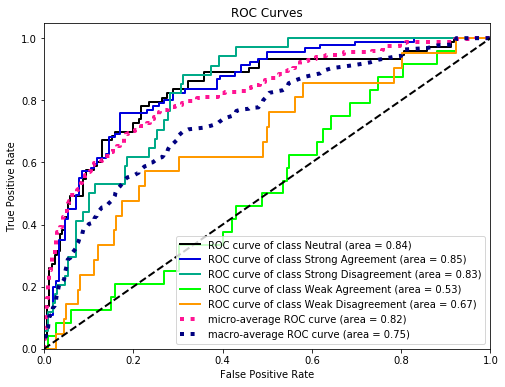

In [26]:
# list(all_feat.columns) with seed=88, seed=100,seed=188
print(classification_report(y_test6,pred,target_names=['Neutral','Strong Agreement(SA)','Strong Disagreement(SD)','Weak Agreement(WA)','Weak Disagreement']))
skplt.metrics.plot_roc_curve(y_test6,y_proba6,figsize=(8,6))
plt.show
plt.savefig('final.png',bbox_inches='tight') #will give a rasterized output, with bbox_inches='tight' will remove the white space around the image
plt.savefig('final.pdf',bbox_inches='tight') #will give a vectorized output

                         precision    recall  f1-score   support

                Neutral       0.71      0.60      0.65        73
   Strong Agreement(SA)       0.59      0.79      0.67        91
Strong Disagreement(SD)       0.37      0.53      0.43        34
     Weak Agreement(WA)       0.00      0.00      0.00        24
      Weak Disagreement       0.00      0.00      0.00        21

              micro avg       0.55      0.55      0.55       243
              macro avg       0.33      0.38      0.35       243
           weighted avg       0.48      0.55      0.51       243



<function matplotlib.pyplot.show(*args, **kw)>

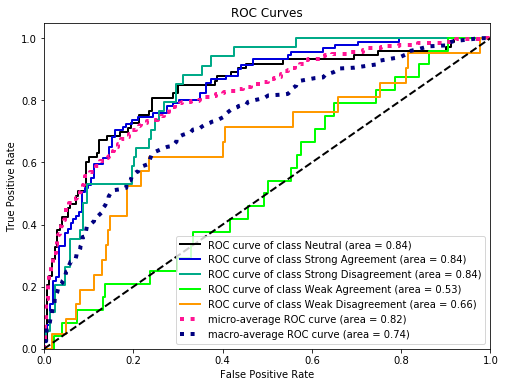

In [13]:
# list(all_feat.columns) with seed=44
print(classification_report(y_test6,pred,target_names=['Neutral','Strong Agreement(SA)','Strong Disagreement(SD)','Weak Agreement(WA)','Weak Disagreement']))
skplt.metrics.plot_roc_curve(y_test6,y_proba6,figsize=(8,6))
plt.show


                         precision    recall  f1-score   support

                Neutral       0.73      0.59      0.65        73
   Strong Agreement(SA)       0.58      0.81      0.68        91
Strong Disagreement(SD)       0.36      0.50      0.42        34
     Weak Agreement(WA)       0.17      0.04      0.07        24
      Weak Disagreement       0.00      0.00      0.00        21

              micro avg       0.56      0.56      0.56       243
              macro avg       0.37      0.39      0.36       243
           weighted avg       0.50      0.56      0.51       243



<function matplotlib.pyplot.show(*args, **kw)>

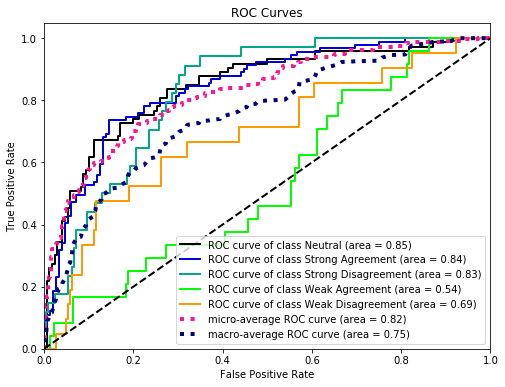

In [10]:
print(classification_report(y_test6,pred,target_names=['Neutral','Strong Agreement(SA)','Strong Disagreement(SD)','Weak Agreement(WA)','Weak Disagreement']))
skplt.metrics.plot_roc_curve(y_test6,y_proba6,figsize=(8,6))
plt.show

In [38]:

import_feat=clf.feature_importances_
coefficients=pd.concat([pd.DataFrame(x.columns,columns=['Predictors']),pd.DataFrame(np.transpose(import_feat),columns=['Feature_importance'])],axis=1)
coef=coefficients.sort_values('Feature_importance',ascending=False)
coef.to_csv('importance_with_centernode.csv',index=False)

In [39]:
# with center node feature
coefficients.sort_values('Feature_importance',ascending=False).head(20)

Predictors  Feature_importance
14        publishing_days            0.065814
7              char_count            0.041071
16                    cnn            0.027941
0         followers_count            0.023397
13              lowercase            0.023397
32   closeness_centrality            0.023060
38     repliers_closeness            0.022387
4          statuses_count            0.021882
3         favorites_count            0.021209
1           friends_count            0.020872
5                   count            0.020535
8                avg_word            0.019862
45                     WC            0.018515
6              word_count            0.018347
50                    WPS            0.018010
27              influence            0.017337
15       membership_years            0.017169
51                 Sixltr            0.015654
104                Period            0.015654
17                 colton            0.015149